Fix δ = 0:05 (95% confidence) and n = 200. Compute 2q2h log n+h log n 2he +log 2 δ : This is natural log

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [79]:
2*np.sqrt(2*((1*np.log(2000) + 1*np.log(2*  2.71828/1) + np.log(2/0.05))/2000))

0.2278853081842991

In [74]:
np.log(2.71828)

0.999999327347282

In [3]:
x = np.random.uniform(-1,1,10)
y = np.zeros(10)
ind = np.asarray(np.argwhere(x > 0))[:,0]
y[ind] = 1
x,y

(array([-0.79098117, -0.34841812, -0.49960135,  0.38163654,  0.07296455,
         0.55595583, -0.89885683,  0.2526229 , -0.90415984, -0.04743342]),
 array([0., 0., 0., 1., 1., 1., 0., 1., 0., 0.]))

In [4]:
min(x[ind])

0.07296455220272935

In [5]:
x[~ind]

array([-0.89885683,  0.55595583,  0.07296455, -0.49960135])

In [6]:
ind

array([3, 4, 5, 7])

In [7]:
def ERM(count=1, S=10):
    error = []
    
    for i in range(count):
        x = np.random.uniform(-1,1,S)
        y = np.zeros(S)
        ind = np.asarray(np.argwhere(x > 0))[:,0]
        y[ind] = 1
        error.append(min(x[ind])/2)
    return error

In [80]:
ans = ERM(count=10000, S=2000)

In [78]:
max(ans)

0.046899321253292325

In [81]:
np.percentile(np.asarray(ans), 95)

0.001485342948643242

In [9]:
len(ans)

10000

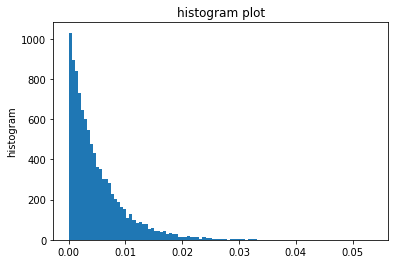

In [23]:
plt.hist(ans, bins=100)
plt.ylabel('histogram');
plt.title('histogram plot');
plt.savefig("q2.png")

In [11]:
np.percentile(np.asarray(ans), 95)

0.01488647466511309

In [12]:
# RL

In [13]:
# Define the states
location_to_state = {
    'A' : 0,
    'B' : 1}

In [14]:
# Initialize parameters
gamma = 0.9 # Discount factor 
alpha = 0.5 # Learning rate

In [15]:
# Define the actions
actions = [0,1]  # "move" and "stay"

In [16]:
# Define the rewards
rewards = np.array([[1,0],
                    [0,1]])

In [17]:
# Maps indices to locations
state_to_location = dict((state,location) for location,state in location_to_state.items())

In [18]:
rewards

array([[1, 0],
       [0, 1]])

In [19]:
import random

In [41]:
# -----------Q-Learning algorithm-----------

# Initializing Q-Values
Q = np.array(np.zeros([2,2]))
Qf = np.array(np.zeros([2,2]))
#The agent starts in state s1 = A
current_state = 0
#print(state_to_location[current_state])

for i in range(200):
    #actions = np.random.randint(0,2)
    n = random.random()
    if n < 0.5:
        actions = 0
    else:
        actions = 1
    if actions == 1:
        next_state = current_state
    else:
        if current_state == 0:
            next_state = 1
        else:
            next_state = 0
    
    #print(state_to_location[current_state], state_to_location[next_state])
    
    Q[current_state,next_state] = (1-alpha)*Q[current_state,next_state] + alpha*(rewards[current_state,next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])])
    current_state = next_state
Qf[0,1] = Q[0,0]
Qf[0,0] = Q[0,1]
Qf[1,1] = Q[1,1]
Qf[1,0] = Q[1,0]

In [42]:
Qf

array([[8.47358857, 9.23064391],
       [8.27699814, 9.43438373]])

# q3.2

In [58]:
# Initializing Q-Values
Q = np.array(np.zeros([2,2]))
Qf = np.array(np.zeros([2,2]))
#The agent starts in state s1 = A
current_state = 0
#print(state_to_location[current_state])

for i in range(200):
    #actions = np.random.randint(0,2)
    n = random.random()
    if n < 0.5:
        actions = np.argmax(Q[current_state,:])
    else:
        actions = np.random.randint(0,2)
                            
    if actions == 1:
        next_state = current_state
    else:
        if current_state == 0:
            next_state = 1
        else:
            next_state = 0
    
    #print(state_to_location[current_state], state_to_location[next_state])
    
    Q[current_state,next_state] = (1-alpha)*Q[current_state,next_state] + alpha*(rewards[current_state,next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])])
    current_state = next_state
Qf[0,1] = Q[0,0]
Qf[0,0] = Q[0,1]
Qf[1,1] = Q[1,1]
Qf[1,0] = Q[1,0]
Qf

array([[8.87491817, 9.35634351],
       [8.36362713, 9.88466698]])

# q3.3

In [59]:
# Initializing Q-Values
Q = np.array(np.zeros([2,2]))
Qf = np.array(np.zeros([2,2]))
#The agent starts in state s1 = A
current_state = 0
#print(state_to_location[current_state])

for i in range(200):
    #actions = np.random.randint(0,2)

    actions = np.argmax(Q[current_state,:])
                          
    if actions == 1:
        next_state = current_state
    else:
        if current_state == 0:
            next_state = 1
        else:
            next_state = 0
    
    #print(state_to_location[current_state], state_to_location[next_state])
    
    Q[current_state,next_state] = (1-alpha)*Q[current_state,next_state] + alpha*(rewards[current_state,next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])])
    current_state = next_state
Qf[0,1] = Q[0,0]
Qf[0,0] = Q[0,1]
Qf[1,1] = Q[1,1]
Qf[1,0] = Q[1,0]
Qf

array([[0., 0.],
       [0., 0.]])